<a href="https://colab.research.google.com/github/rubincus/Test1/blob/master/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Regresion Lineal: Minimos cuadrados

En este notebook, abordaremos los conceptos básicos y hablaremos sobre la regresión de mínimos cuadrados. ¿Por qué deberíamos hablar de eso? Porque, lo creas o no, este método simple todavía se usa en el análisis estadístico, donde hay muchos datos para analizar. Muchos problemas son lineales o tienen una forma similar a la lineal.Adicionalmente se usa para observar tendencias en los datos. Primero vamos a conocer la matemática detras de esto.


![Regresion](https://drive.google.com/uc?export=view&id=1oFeERMdP3O7p74J6P9qwJ2kCGPcM2cas)

### Algebra lineal y notaciones

Si ven la ecuación de abajo, quien es $A$, $\vec{x}$ y $\vec{c}$
## $$A\vec{x} = \vec{c}$$

¿Como resolvemos una ecuación de ese tipo?

Si ven la ecuación de abajo, quien es $A^{-1}$. ¿Que propiedades debe tener $A$, para que el sistema se pueda resolver?
## $$ \vec{x} = A^{-1} \vec{c} $$

Por otra parte en nuestra regresión lineal y en forma mas general en ML tenemos una función $f$ que queremos ajustar de tal forma que se cumpla:

##$$ f(\vec{x})=\vec{y}$$  

En nuestro caso la f va a ser una función lineal y eso lo queremos aprender de los datos. Esta f va a tener un conjunto de parámetros que necesitamos ajustar. En el caso de la función lineal 

## $$ X\vec{w} = \vec{y}$$


¿Como medimos que tan buena es la recta propuesta?, A través de una loss function la cual será nuestra función objetivo. La mas natural utilizar es $L_2$ o euclideana:

## $$ MSE = \frac{1}{2}|| X\vec{w} - y||^2$$

¿Y que queremos hacer con esta loss function?, en este caso minimizarla. Es decir

$$ \frac{\partial MSE}{\partial w} = 0$$

Calculemos esa expresión

## $$ MSE = \frac{1}{2}|| X\vec{w} - y||^2 = (X\vec{w}-y)^T(X\vec{w}-y)$$

## $$(X\vec{w}-\vec{y})^T(X\vec{w}-\vec{y}) = w^TX^TXw - y^TXw - w^TX^Ty + y^Ty$$

## $$\frac{\partial (w^TX^TXw - y^TXw - w^TX^Ty + y^Ty)}{\partial w} = 2X^TXw - 2X^Ty$$

Aquí debemos recordar que $\frac{d(w^TAw)}{dw} = 2Ax$, que $\frac{d(w^A)}{dw} = A$ y $\frac{d(Aw)}{w}= A^T$

Por lo tanto tenemos despejando $w$:

## $$ w = (X^TX)^{-1}X^Ty$$







## Vamos a implementarlo y a probar


Ayuda
```
# Utilice np.matmult para multiplicar matrices
# Utilice  np.linalg.inv para invertir matrices
```



In [ ]:
# Implemente la multiplicacion de la ecuación final
def estima_w(X,y):
  w_inverse = np.linalg.inv(np.matmul(X.T,X))
  w_right = np.matmul(X.T,y)  
  return  np.matmul(w_inverse,w_right)

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
import pandas



# Generemos la data
np.random.seed(222)
X = np.random.normal(0,1, (200, 1))
w_target = np.random.normal(0,1, (1,1))
# data + white noise
y = X*w_target + np.random.normal(0, 1, (200,1))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Apliquemos Least Squares y estimemos
w_estimate = estima_w(X,y)
y_estimate = X*w_estimate 

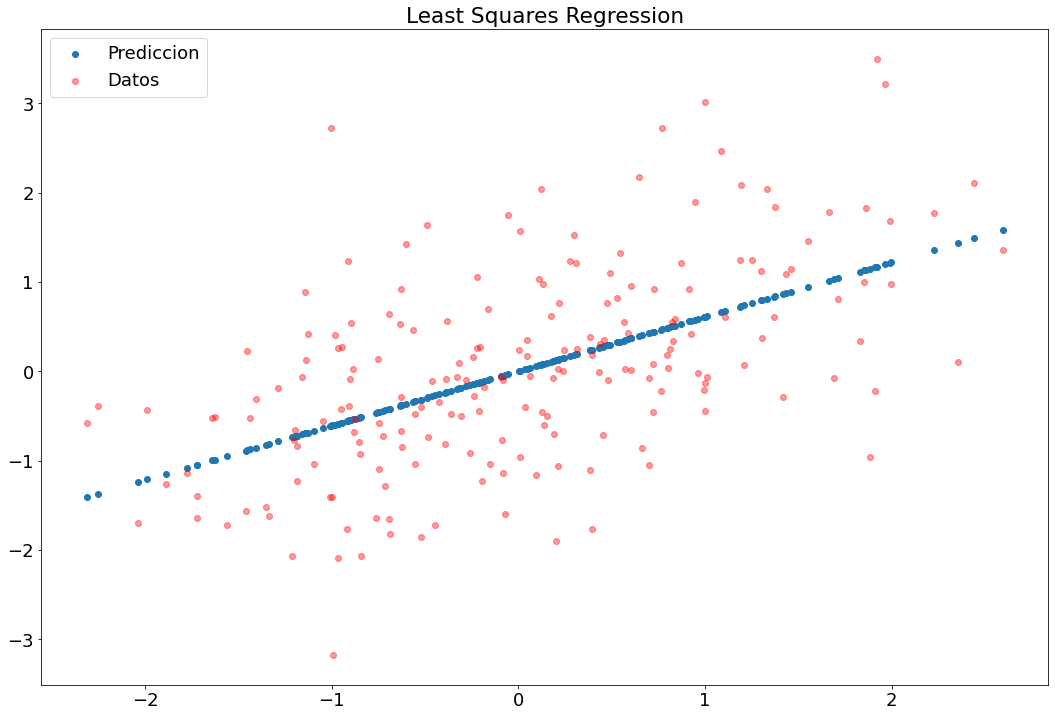

In [ ]:
# Dibujemos la data.
plt.figure(figsize=(15,10))
plt.scatter(X.flat, y_estimate.flat, label="Prediccion")
plt.scatter(X.flat, y.flat, color='red', alpha=0.4, label="Datos")
plt.tight_layout()
plt.title("Least Squares Regression")
plt.legend()
plt.show()


### Regresion Lineal utilizando Gradient Descent

El objetivo principal del algoritmo de descenso de gradiente es minimizar la función de costo. Es uno de los  algoritmos mas utilizado en la optimización para minimizar errores (diferencia de valor real y valor predicho).

Representemos por h, una función o un algoritmo de aprendizaje.

## $$ h_{\theta} = \theta_0 + \theta_1x$$

 Usando el algoritmo de descenso de gradiente también, descubriremos una función de costo mínimo aplicando varios parámetros para $\theta_0$ y $\theta_1$ y veremos la intersección de la pendiente hasta que alcance la convergencia.

 ![Regresion](https://drive.google.com/uc?export=view&id=1Ax3fVm2_kcvIqyUPxhMap5rtugux3oKG)


Consideremos el caso simple de $h$ entonces la función de costos es :

## $$ L(\theta_0,\theta_1) = \frac{1}{2m} \sum_{i=1}^m(h_{\theta}(x_i) - y_i)^2$$

¿Por qué usamos derivada parcial en la ecuación? Las derivadas parciales representan la tasa de cambio de las funciones como el cambio variable. En nuestro caso, cambiamos los valores para $\theta_0$  y $\theta_1$ e identifica la tasa de cambio. 


## $$\frac{\partial L(\theta_0,\theta_1)}{\partial \theta_0} = \frac{1}{m} \sum(h_{\theta}(x_i)-y_i)$$

## $$\frac{\partial L(\theta_0,\theta_1)}{\partial \theta_1} = \frac{1}{m} \sum(h_{\theta}(x_i)-y_i)x_i$$



### Como actualizamos de los pesos

Utiliando la derivada en cada peso, hacemos su actualización de la siguiente forma.

## $$ \theta_0 = \theta_0 - \alpha\frac{1}{m}\sum(h_{\theta}(x_i)-y_i) $$
## $$ \theta_1 = \theta_1 - \alpha\frac{1}{m}\sum(h_{\theta}(x_i)-y_i)x_i $$

In [ ]:
def derivatives(theta0, theta1, X, y):
	dtheta0 = 0
	dtheta1 = 0
	for (xi, yi) in zip(X, y):
		dtheta0 += hypothesis(theta0, theta1, xi) - yi
		dtheta1 += (hypothesis(theta0, theta1, xi) - yi)*xi

	dtheta0 /= len(X)
	dtheta1 /= len(X)

	return dtheta0, dtheta1

In [ ]:

def hypothesis(theta0, theta1, x):
	return theta0 + (theta1*x) 

In [ ]:
def updateParameters(theta0, theta1, X, y, alpha):
	dtheta0, dtheta1 = derivatives(theta0, theta1, X, y)
	theta0 = theta0 - (alpha * dtheta0)
	theta1 = theta1 - (alpha * dtheta1)

	return theta0, theta1

In [ ]:
def LinearRegression(X, y):

  theta0 = np.random.rand()
  theta1 = np.random.rand()
  for i in range(0, 1000):
	  theta0, theta1 = updateParameters(theta0, theta1, X, y, 0.005)
  
  return theta0, theta1

In [ ]:
def plotLine(theta0, theta1, X, y):
	max_x = np.max(X) + 100
	min_x = np.min(X) - 100

	xplot = np.linspace(min_x, max_x, 1000)
	yplot = theta0 + theta1 * xplot

	plt.plot(xplot, yplot, color='#ff0000', label='Regression Line')

	plt.scatter(X,y)
	plt.axis([-10, 10, 0, 200])
	plt.show()

In [ ]:
theta0, theta1 = LinearRegression(X, y)
print(theta0, theta1)

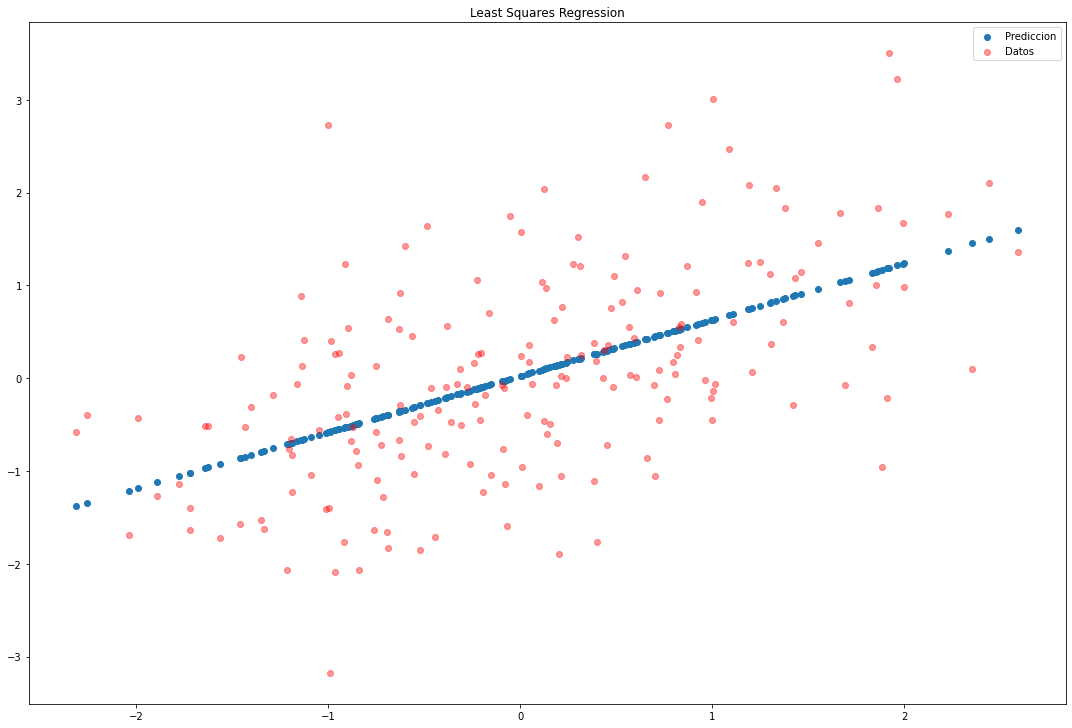

In [ ]:
# Dibujemos la data.

y_estimate = theta0 + X*theta1
plt.figure(figsize=(15,10))
plt.scatter(X.flat, y_estimate.flat, label="Prediccion")
plt.scatter(X.flat, y.flat, color='red', alpha=0.4, label="Datos")
plt.tight_layout()
plt.title("Gradient Descent")
plt.legend()
plt.show()
